In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Figure 5

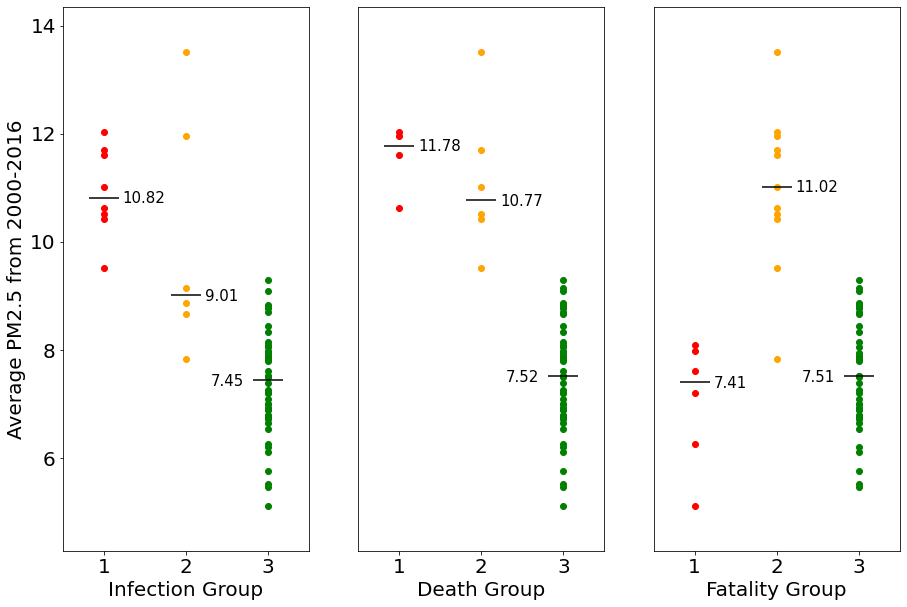

In [ ]:
sydata = pd.read_csv("/covid19-project/final file/data/sycluster.csv")

clusters = ['CaseCluster', 'DeathCluster', 'PosDeathCluster']
clustdict = {'CaseCluster' : 'Infection Group', 'DeathCluster': 'Death Group', 'PosDeathCluster': 'Fatality Group'}

pmdata = pd.read_csv("/covid19-project/final file/data/NY_Counties_PM2.5.csv")
pmdata['County'] = pmdata['County'].map(lambda x: x[:-7].title())
pmdata['County'] = pmdata['County'].replace({'Richmond': 'Staten Island', 'New York': 'Manhattan', 'Kings' : 'Brooklyn'})
pmdata = pmdata.groupby('County').mean()

pmclusterdata = sydata.merge(pmdata, on = 'County')

i = 0
subplots = [131, 132, 133]
plt.figure(figsize=(15,10))
ax = [plt.subplot(subplots[0]), plt.subplot(subplots[1]), plt.subplot(subplots[2])]
for cluster in clusters:

  pmclusterdataPoscust1 = pmclusterdata[pmclusterdata[cluster] == 1]
  pmclusterdataPoscust2 = pmclusterdata[pmclusterdata[cluster] == 2]
  pmclusterdataPoscust3 = pmclusterdata[pmclusterdata[cluster] == 3]

  qcust1 = [np.quantile(pmclusterdataPoscust1['pm25'].to_list(), 0.5)]
  qcust2 = [np.quantile(pmclusterdataPoscust2['pm25'].to_list(), 0.5)]
  qcust3 = [np.quantile(pmclusterdataPoscust3['pm25'].to_list(), 0.5)]
  
  ax[i].scatter(pmclusterdataPoscust1[cluster], pmclusterdataPoscust1['pm25'], color='red')
  ax[i].scatter([1], qcust1, marker='_', s=[30**2], color='black')

  ax[i].text(1.23, qcust1[0]-0.1, str(round(qcust1[0],2)), fontsize = 15)

  ax[i].scatter(pmclusterdataPoscust2[cluster], pmclusterdataPoscust2['pm25'], color='orange')
  ax[i].scatter([2], qcust2, marker='_', s=[30**2], color='black')

  if cluster == 'CaseCluster' :
    ax[i].text(2.23, qcust2[0]-0.1, str(round(qcust2[0],2)), fontsize = 15)
  else :
    ax[i].text(2.23, qcust2[0]-0.1, str(round(qcust2[0],2)), fontsize = 15)

  ax[i].scatter(pmclusterdataPoscust3[cluster], pmclusterdataPoscust3['pm25'], color='green')
  ax[i].scatter([3], qcust3, marker='_', s=[30**2], color='black')

  ax[i].text(3-0.7, qcust3[0]-0.1, str(round(qcust3[0],2)), fontsize =15)
  
  ax[i].tick_params(axis='both', which='major', labelsize=20)
  ax[i].set_xticks(np.arange(1, 4, step=1))
  # ax[i].set_yticks(np.arange(20, 56, step=5))

  if i == 0:
    ax[i].tick_params(axis='y', colors='black')
  else:
    ax[i].tick_params(axis='y', colors='white')

  ax[i].set_xlabel(clustdict[cluster], fontsize=20)

  if i == 0:
    ax[i].set_ylabel('Average PM2.5 from 2000-2016', fontsize=20)
  else:
    ax[i].set_ylabel('', fontsize=20)

  ax[i].margins(x=0.25, y=0.1)

  i += 1

plt.show()